In [10]:
import numpy as np
import pandas as pd
import importlib
import matplotlib.pyplot as plt
%matplotlib widget
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import tools
import math_functions as mf

importlib.reload(tools)
importlib.reload(mf)


<module 'math_functions' from 'c:\\Users\\Orlando\\Desktop\\DREAM_repo\\math_functions.py'>

In [11]:
folder = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/20240131_light_calib/"       
calib = pd.read_csv(folder + "20240131_light_calib.csv", sep=";")


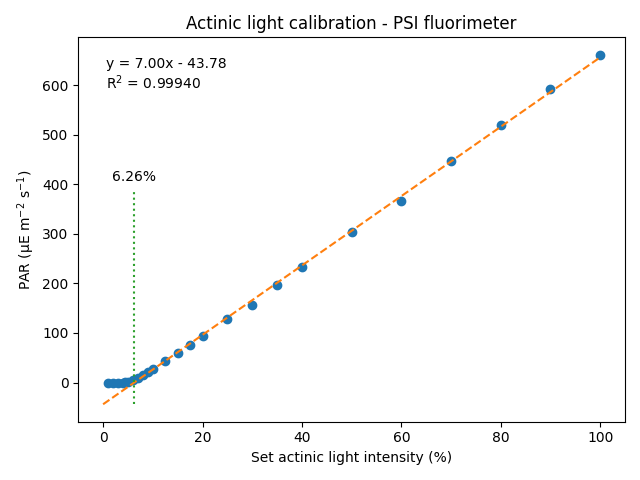

In [12]:
fig, ax = plt.subplots()
ax.plot(calib.AL, calib.PAR, 'o')
ax.set_xlabel("Set actinic light intensity (%)")
ax.set_ylabel("PAR (µE m$^{-2}$ s$^{-1}$)")
popt, xfit, yfit, rs = tools.lin_fit(calib.AL[5:], calib.PAR[5:], 0, 100, 100)
ax.plot(xfit, yfit, '--')
ax.text(0.05, 0.95, "y = {:.2f}x - {:.2f}\nR$^2$ = {:.5f}".format(popt[0], -popt[1], rs), transform=ax.transAxes, va='top', ha='left')
intercept = -popt[1]/popt[0]
ax.plot([intercept, intercept], [popt[1], 390], ':')
ax.text(intercept, 400, "{:.2f}%".format(intercept), va='bottom', ha='center')
ax.set_title("Actinic light calibration - PSI fluorimeter")
fig.tight_layout()
fig.savefig(folder + "20240131_light_calib.png", dpi=300)

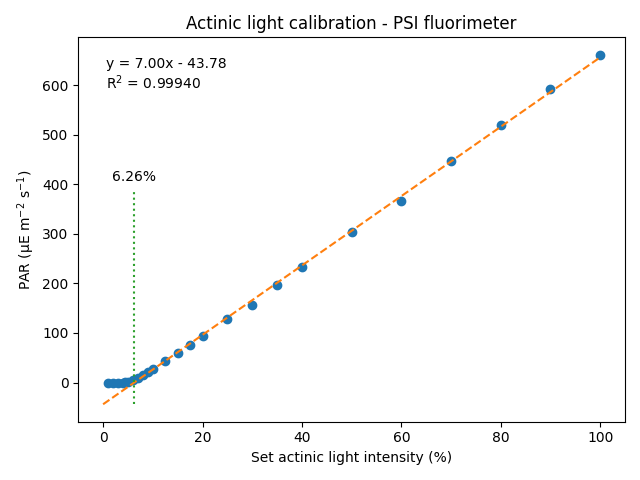

In [13]:
fig, ax = plt.subplots()
ax.plot(calib.AL, calib.PAR, 'o')
ax.set_xlabel("Set actinic light intensity (%)")
ax.set_ylabel("PAR (µE m$^{-2}$ s$^{-1}$)")
popt, xfit, yfit, rs = tools.lin_fit(calib.AL[5:], calib.PAR[5:], 0, 100, 100)
ax.plot(xfit, yfit, '--')
ax.text(0.05, 0.95, "y = {:.2f}x - {:.2f}\nR$^2$ = {:.5f}".format(popt[0], -popt[1], rs), transform=ax.transAxes, va='top', ha='left')
intercept = -popt[1]/popt[0]
ax.plot([intercept, intercept], [popt[1], 390], ':')
ax.text(intercept, 400, "{:.2f}%".format(intercept), va='bottom', ha='center')
ax.set_title("Actinic light calibration - PSI fluorimeter")
fig.tight_layout()
fig.savefig(folder + "20240131_light_calib.png", dpi=300)

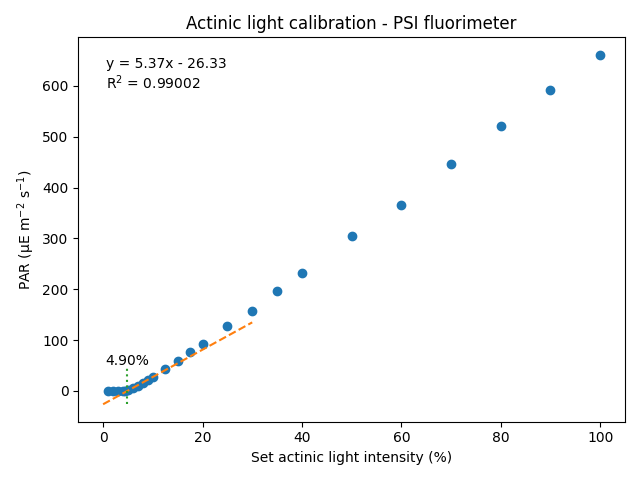

In [14]:
fig, ax = plt.subplots()
ax.plot(calib.AL, calib.PAR, 'o')
ax.set_xlabel("Set actinic light intensity (%)")
ax.set_ylabel("PAR (µE m$^{-2}$ s$^{-1}$)")
popt, xfit, yfit, rs = tools.lin_fit(calib.AL[4:12], calib.PAR[4:12], 0, 30, 100)
ax.plot(xfit, yfit, '--')
ax.text(0.05, 0.95, "y = {:.2f}x - {:.2f}\nR$^2$ = {:.5f}".format(popt[0], -popt[1], rs), transform=ax.transAxes, va='top', ha='left')
intercept = -popt[1]/popt[0]
ax.plot([intercept, intercept], [popt[1], 45], ':')
ax.text(intercept, 45, "{:.2f}%".format(intercept), va='bottom', ha='center')
ax.set_title("Actinic light calibration - PSI fluorimeter")
fig.tight_layout()
fig.savefig(folder + "20240131_light_calib.png", dpi=300)

In [15]:
from scipy.optimize import curve_fit
def quadratic_fit(xdata, ydata, start, stop, num, p0 = None):
    def quadratic(x, a, b, c):
        return a*x**2 + b*x + c
    popt, pcov = curve_fit(quadratic, xdata, ydata, p0=p0)
    xfit = np.linspace(start, stop, num)
    yfit = quadratic(xfit, *popt)
    y_pred = quadratic(xdata, *popt)
    residuals = ydata - y_pred
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((ydata - np.mean(ydata))**2)
    r_squared = 1 - (ss_res / ss_tot)
    
    return popt, xfit, yfit, r_squared

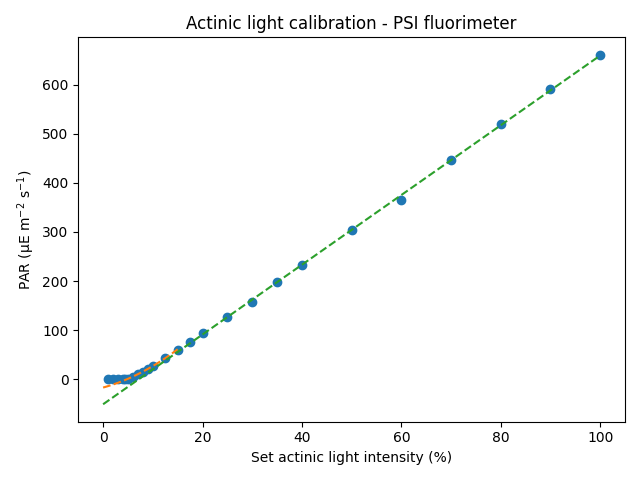

In [16]:
fig, ax = plt.subplots()
ax.plot(calib.AL, calib.PAR, 'o')
ax.set_xlabel("Set actinic light intensity (%)")
ax.set_ylabel("PAR (µE m$^{-2}$ s$^{-1}$)")
popt_quad, xfit, yfit, rs = quadratic_fit(calib.AL[5:12], calib.PAR[5:12], 0, calib.AL[12], 100)
ax.plot(xfit, yfit, '--')

popt, xfit, yfit, rs = tools.lin_fit(calib.AL[12:], calib.PAR[12:], 0, 100, 100)
ax.plot(xfit, yfit, '--')

ax.set_title("Actinic light calibration - PSI fluorimeter")
fig.tight_layout()
fig.savefig(folder + "20240131_light_calib.png", dpi=300)

In [43]:
def get_PAR(AL):
    popt_quad = [  0.1628436 ,   2.75648771, -17.10740481]
    popt_lin = [  7.09300446, -50.12770528]
    if AL > 15:
        return popt_lin[0]*AL + popt_lin[1]
    elif AL <= 4.5:
        return 0
    else:
        return popt_quad[0]*AL**2 + popt_quad[1]*AL + popt_quad[2]
    
    
def get_AL(PAR):
    popt_quad = [-2.04276436e-03,  2.42454555e-01,  4.78772436e+00]
    popt_lin = [0.1412651 , 6.93679966]
    if PAR > 27:
        return popt_lin[0]*PAR + popt_lin[1]
    else:
        return popt_quad[0]*PAR**2 + popt_quad[1]*PAR + popt_quad[2]

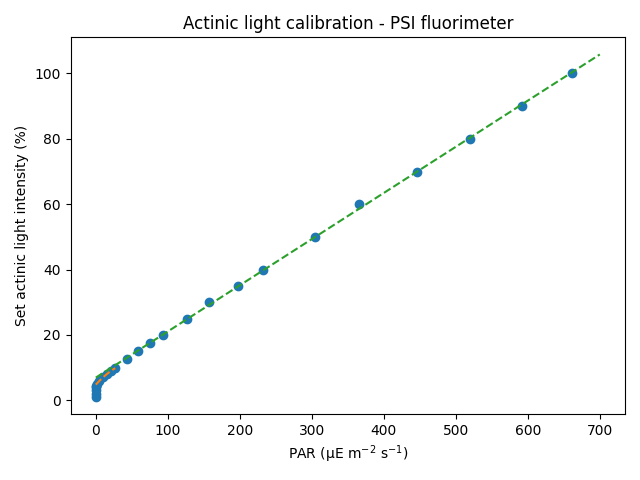

In [44]:
fig, ax = plt.subplots()
ax.plot(calib.PAR, calib.AL, 'o')
ax.set_ylabel("Set actinic light intensity (%)")
ax.set_xlabel("PAR (µE m$^{-2}$ s$^{-1}$)")

popt_quad, xfit, yfit, rs = quadratic_fit(calib.PAR[5:10], calib.AL[5:10], 0, calib.PAR[10], 100)
ax.plot(xfit, yfit, '--')

popt, xfit, yfit, rs = tools.lin_fit(calib.PAR[10:], calib.AL[10:], 0, 700, 100)
ax.plot(xfit, yfit, '--')

ax.set_title("Actinic light calibration - PSI fluorimeter")
fig.tight_layout()
fig.savefig(folder + "20240131_light_calib_reverse.png", dpi=300)

In [45]:
popt

array([0.1412651 , 6.93679966])

In [46]:
popt_quad

array([-2.04276436e-03,  2.42454555e-01,  4.78772436e+00])

In [47]:
def get_AL(PAR):
    popt_quad = [-2.04276436e-03,  2.42454555e-01,  4.78772436e+00]
    popt_lin = [0.1412651 , 6.93679966]
    if PAR > 27:
        return popt_lin[0]*PAR + popt_lin[1]
    else:
        return popt_quad[0]*PAR**2 + popt_quad[1]*PAR + popt_quad[2]

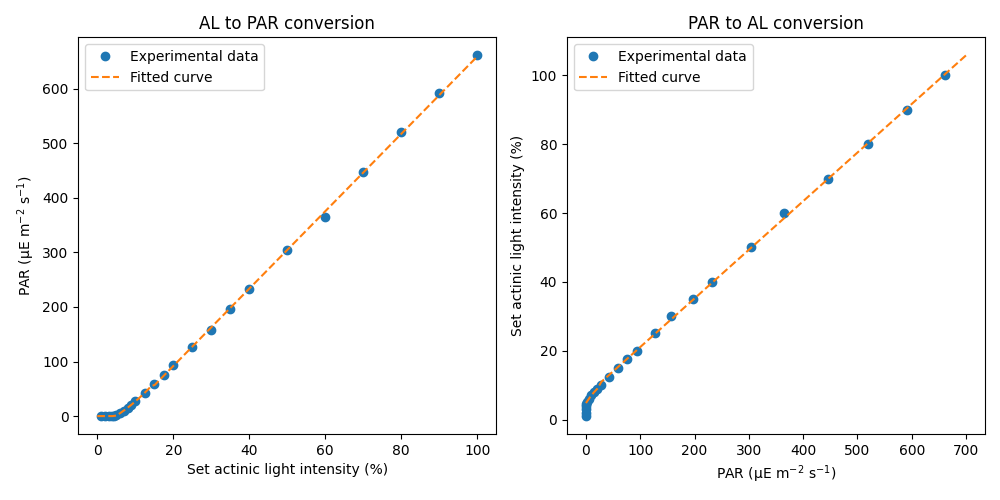

In [48]:
PAR_list = np.linspace(0, 700, 100)
AL_list = [get_AL(PAR) for PAR in PAR_list]

fig, ax = plt.subplots(1,2, figsize=(10, 5))
ax[1].plot(calib.PAR, calib.AL, 'o', label="Experimental data") 
ax[1].plot(PAR_list, AL_list, '--', label="Fitted curve")
ax[1].set_ylabel("Set actinic light intensity (%)")
ax[1].set_xlabel("PAR (µE m$^{-2}$ s$^{-1}$)")
ax[1].legend()
ax[1].set_title("PAR to AL conversion")

AL_list = np.linspace(0, 100, 100)
PAR_list = [get_PAR(AL) for AL in AL_list]

ax[0].plot(calib.AL, calib.PAR, 'o', label="Experimental data")
ax[0].plot(AL_list, PAR_list, '--', label="Fitted curve")
ax[0].set_xlabel("Set actinic light intensity (%)")
ax[0].set_ylabel("PAR (µE m$^{-2}$ s$^{-1}$)")
ax[0].legend()
ax[0].set_title("AL to PAR conversion")
fig.tight_layout()
fig.savefig(folder + "20240131_light_calib_both.png", dpi=300)


